# Supervised learning - Python - logistic regression

In [1]:
import pandas as pd

dataset = pd.read_csv('data/social_network_ads.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15755018,Male,36,33000,0
1,15649668,Male,41,79000,0
2,15807909,Male,19,85000,0
3,15668521,Female,48,35000,1
4,15587419,Female,42,90000,1


In [2]:
import numpy as np

X = dataset.iloc[:, [2, 3]].values
X = X.astype(np.float64)
X[:5, :]

array([[3.6e+01, 3.3e+04],
       [4.1e+01, 7.9e+04],
       [1.9e+01, 8.5e+04],
       [4.8e+01, 3.5e+04],
       [4.2e+01, 9.0e+04]])

In [3]:
y = dataset.iloc[:, -1].values
y[:5]

array([0, 0, 0, 1, 1])

In [4]:
# apply feature scaling only on the features, not the label
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [5]:
# split training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [6]:
X_train[:5, :]

array([[-0.34910049,  1.32898   ],
       [-0.92217926, -0.31545197],
       [ 0.70154394, -1.28449224],
       [-0.25358736,  0.21311545],
       [-1.87731056, -0.05116826]])

In [7]:
X_test[:5, :]

array([[-1.87731056, -0.75592482],
       [ 0.12846516, -0.25672226],
       [-0.25358736, -0.9027491 ],
       [-0.0625611 ,  0.2424803 ],
       [-0.54012675,  0.47739916]])

In [8]:
# fit logistic regression to training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# predicting test set results
y_pred = classifier.predict(X_test)

In [10]:
# make the confusion matrix which will helps us figuring out
# true positive rate (TPR), recall, sensitivity : true positive / condition positive
# false positive rate (FPR), fall out : false positive / condition negative
# false negative rate (FNR), miss rate : false negative / condition positive
# true negative rate (TNR), specificity (SPC) : true negative / condition negative
#
# accuracy : (true positive + true negative) / total population
# prevalence : condition positive / total population
# positive predictive value (PPV), precision : true positive / predicted condition positive
# false discovery rate (FDR): false positive / predicted condition positive
# false omission rate (FOR) : false negative / predicted condition negative
# negative predirective value (NPV) : true negative / predirected condition negative
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm
# top left and bottom right are correct prediction
# top right and bottom left are incorrect prediction

array([[58,  3],
       [10, 29]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


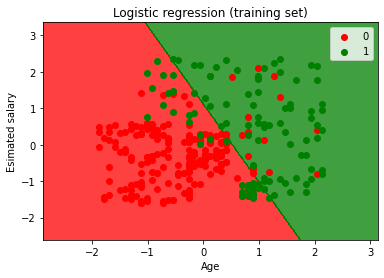

In [11]:
%matplotlib inline

# visualising the training set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

X_set, y_set = X_train, y_train

# simulate new users (one pixel = 1 user) and use the classifier to make prediction for that user
# this gives the red and green area
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# plot the point of the real dataset
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic regression (training set)')
plt.xlabel('Age')
plt.ylabel('Esimated salary')
plt.legend()
plt.show()

# red on red are the training examples for which the purchase was correctly predicted to be 0 (no)
# green on green are the training examples for which the purchase was correctly predicted to be 1 (yes)
# green on red are the training examples for which the purchase was incorrectly predicted to be 0
# red on green are the training examples for which the purchase was incorrectly predirected to be 1
# the straight line is the prediction boundary, straight line because it is a linear classifier

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


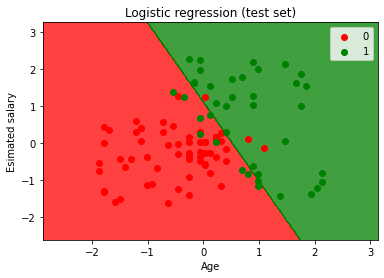

In [12]:
%matplotlib inline

# visualising the test set results
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic regression (test set)')
plt.xlabel('Age')
plt.ylabel('Esimated salary')
plt.legend()
plt.show()